In [20]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd

In [21]:
def equation_to_fit(x, basal, maximal, Kd, n):
    Y = basal + maximal * (x**n / (Kd + x**n))
    return Y
list_of_params_to_fit = ['Basal', 'Max', 'Kd', 'n']

In [22]:
def report_paramaters(fit_param_names, fit_param_values, fit_param_stdevs):
    for each in range(len(fit_param_names)):
        print(fit_param_names[each], 'is', fit_param_values[each], 'with a standard deviation of', fit_param_stdevs[each])

In [27]:
path = "/Users/Weiss Lab/Documents/Jupyter Notebooks/Curve-Fitting/HillTestData.xlsx"
#path = "/Users/Nicholas/Documents/Jupyter Notebooks/Curve-Fitting/HillTestData.xlsx"
MyData = pd.read_excel(path)


######################## Some reminders ########################
# MyData                  # Shows the entire dataframe
# MyData.x                # Data of column called "x"
# MyData.iloc[0,:]        # First row
# MyData.iloc[:,0]        # First column
# MyData.columns[0]       # Name of first column

In [24]:
'''Return the fitted paramaters and their covariance for the fitted curve'''
init_guess = [1, 1, 1, 1]
low_bounds = [0, 0, 0, 0]
up_bounds = [10000, 10000, 10000, 10000]
fit_params, covar_params = curve_fit(equation_to_fit, MyData.iloc[:,0], MyData.iloc[:,1], p0 = init_guess, bounds=(low_bounds, up_bounds)) 
std_dev_error_of_fit_params = np.sqrt(np.diag(covar_params))
report_paramaters(list_of_params_to_fit, fit_params, std_dev_error_of_fit_params)

Basal is 18.2177218987 with a standard deviation of 15.4128480541
Max is 631.685454095 with a standard deviation of 26.606250531
Kd is 27.6556260327 with a standard deviation of 13.7664339102
n is 1.21085880615 with a standard deviation of 0.185069274678


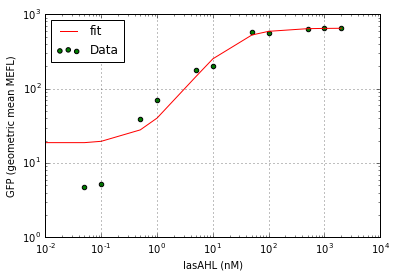

In [28]:
plt.scatter(MyData.iloc[:,0], MyData.iloc[:,1], c='g', label='Data')
plt.plot(MyData.iloc[:,0], equation_to_fit(MyData.iloc[:,0], *fit_params), c='r', label='fit')
plt.xlabel(MyData.columns[0])
plt.ylabel(MyData.columns[1])
plt.legend(loc = 'best')
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.show()